#This program demonstrate data cleaning, preprocessing and training using Python Pandas library.

In [ ]:
import pandas as pd

##1. Data Loading and Inspection
####i. Loading data from SalesData.csv .
####ii. Printing dimensions of the dataset.
####iii. Printing datatypes of all columns of the dataset.
####iv. Display summary of dataset using data.info()
####v. Display statistics of data using data.describe()

In [ ]:
data = pd.read_csv('Sales_Data.csv')
print(f"First 10 rows of the dataset :\n {data.head(10)}")

First 10 rows of the dataset :
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0      10107.0             30.0      95.70              2.0  2871.00   
1      10121.0             34.0      81.35              5.0  2765.90   
2      10134.0             41.0      94.74              2.0  3884.34   
3      10145.0             45.0      83.26              6.0  3746.70   
4      10159.0             49.0     100.00             14.0      NaN   
5      10168.0             36.0      96.66              1.0  3479.76   
6      10180.0             29.0      86.13              9.0  2497.77   
7      10188.0             48.0     100.00              1.0  5512.32   
8      10201.0             22.0      98.57              2.0  2168.54   
9      10211.0             41.0     100.00             14.0  4708.44   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped     1.0       NaN   2003.0  ...   
1              NaN  Shipped     2.0       5.0   2

In [ ]:
print(f"Dimensions of the dataset {data.shape}")

Dimensions of the dataset (2823, 25)


In [ ]:
print(f"Datatypes of the columns of the dataset : {data.dtypes}")

Datatypes of the columns of the dataset : ORDERNUMBER         float64
QUANTITYORDERED     float64
PRICEEACH           float64
ORDERLINENUMBER     float64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID              float64
MONTH_ID            float64
YEAR_ID             float64
PRODUCTLINE          object
MSRP                float64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


In [ ]:
print(f"Summary of the dataset {data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2682 non-null   float64
 1   QUANTITYORDERED   2682 non-null   float64
 2   PRICEEACH         2682 non-null   float64
 3   ORDERLINENUMBER   2682 non-null   float64
 4   SALES             2682 non-null   float64
 5   ORDERDATE         2682 non-null   object 
 6   STATUS            2682 non-null   object 
 7   QTR_ID            2682 non-null   float64
 8   MONTH_ID          2682 non-null   float64
 9   YEAR_ID           2682 non-null   float64
 10  PRODUCTLINE       2682 non-null   object 
 11  MSRP              2682 non-null   float64
 12  PRODUCTCODE       2682 non-null   object 
 13  CUSTOMERNAME      2682 non-null   object 
 14  PHONE             2682 non-null   object 
 15  ADDRESSLINE1      2682 non-null   object 
 16  ADDRESSLINE2      285 non-null    object 


In [ ]:
print(f" Statistical Analysis of the data {data.describe()}")

 Statistical Analysis of the data         ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2682.000000      2682.000000  2682.000000      2682.000000   
mean   10258.961596        35.035048    83.727651         6.472782   
std       92.011889         9.662579    20.147271         4.232453   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    69.160000         3.000000   
50%    10263.000000        35.000000    95.800000         6.000000   
75%    10333.000000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID      YEAR_ID         MSRP  
count   2682.000000  2682.000000  2682.000000  2682.000000  2682.000000  
mean    3551.496234     2.714392     7.077181  2003.818046   100.826995  
std     1840.029298     1.204125     3.645879     0.699338    40.327972  
min      482.130000     1.000000     1.

In [ ]:
# Part 2
print(f" Number of NULL values in the dataset(column-wise) : {data.isnull().sum()}")

 Number of NULL values in the dataset(column-wise) : ORDERNUMBER          141
QUANTITYORDERED      141
PRICEEACH            141
ORDERLINENUMBER      141
SALES                141
ORDERDATE            141
STATUS               141
QTR_ID               141
MONTH_ID             141
YEAR_ID              141
PRODUCTLINE          141
MSRP                 141
PRODUCTCODE          141
CUSTOMERNAME         141
PHONE                141
ADDRESSLINE1         141
ADDRESSLINE2        2538
CITY                 141
STATE               1556
POSTALCODE           214
COUNTRY              141
TERRITORY           1176
CONTACTLASTNAME      141
CONTACTFIRSTNAME     141
DEALSIZE             141
dtype: int64


## 2. Data Cleaning
#### i. Used mean (numerical data) , 'unknown' and fillf() (categorical data) to fill null values.
#### ii. Removing columns with high no. (> 1000) missing values.
#### iii. Standardize product names by removing extra spaces and converting to lowercase.
#### iv. Convert QUANTITYORDERED and PRICEEACH to numeric values using pd.to_numeric()
#### v. Convert ORDERDATE to datetime using pd.to_datetime()

In [ ]:
# counting rows before and after data cleaning
original_data = pd.read_csv('Sales_Data.csv')
print(f"Number of rows before data cleaning {original_data.shape[0]}")

Number of rows before data cleaning 2823


In [ ]:
# Convert ORDERDATE
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')
data['ORDERDATE'] = data['ORDERDATE'].ffill()

# Fill numeric columns
data['QUANTITYORDERED'] = data['QUANTITYORDERED'].fillna(data['QUANTITYORDERED'].median())
data['PRICEEACH'] = data['PRICEEACH'].fillna(data['PRICEEACH'].median())
data['ORDERLINENUMBER'] = data['ORDERLINENUMBER'].fillna(data['ORDERLINENUMBER'].median())

# Derive SALES = QUANTITYORDERED * PRICEEACH
data['SALES'] = data['QUANTITYORDERED'] * data['PRICEEACH']

# Fill categorical columns
data['STATUS'] = data['STATUS'].fillna(data['STATUS'].mode()[0])
data['PRODUCTLINE'] = data['PRODUCTLINE'].fillna('Unknown')
data['PRODUCTCODE'] = data['PRODUCTCODE'].fillna('Unknown')
data['CUSTOMERNAME'] = data['CUSTOMERNAME'].fillna('Unknown')
data['PHONE'] = data['PHONE'].fillna('N/A')
data['CITY'] = data['CITY'].fillna('Unknown')
data['COUNTRY'] = data['COUNTRY'].fillna('Unknown')
data['CONTACTLASTNAME'] = data['CONTACTLASTNAME'].fillna('Unknown')
data['CONTACTFIRSTNAME'] = data['CONTACTFIRSTNAME'].fillna('Unknown')
data['DEALSIZE'] = data['DEALSIZE'].fillna(data['DEALSIZE'].mode()[0])

# Extract and fill QTR_ID, MONTH_ID, YEAR_ID from ORDERDATE
data['QTR_ID'] = data['ORDERDATE'].dt.quarter
data['MONTH_ID'] = data['ORDERDATE'].dt.month
data['YEAR_ID'] = data['ORDERDATE'].dt.year

# Droping highly null columns
data.drop(columns=['ADDRESSLINE2', 'TERRITORY', 'POSTALCODE', 'STATE'], inplace=True)

# Final check
print("Final Null Values:\n", data.isnull().sum())


Final Null Values:
 ORDERNUMBER         141
QUANTITYORDERED       0
PRICEEACH             0
ORDERLINENUMBER       0
SALES                 0
ORDERDATE             0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                141
PRODUCTCODE           0
CUSTOMERNAME          0
PHONE                 0
ADDRESSLINE1        141
CITY                  0
COUNTRY               0
CONTACTLASTNAME       0
CONTACTFIRSTNAME      0
DEALSIZE              0
dtype: int64


In [ ]:
# Fill ORDERNUMBER
data['ORDERNUMBER'] = data['ORDERNUMBER'].fillna(method='ffill')
data['ORDERNUMBER'] = data['ORDERNUMBER'].fillna('UnknownOrder')

# Keep ADDRESSLINE1 and fill smartly
data['ADDRESSLINE1'] = data['ADDRESSLINE1'].fillna('Address not provided')

# Drop MSRP
data.drop(columns=['MSRP'], inplace=True)

# Final check
print("Final Nulls:\n", data.isnull().sum())


Final Nulls:
 ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


/tmp/ipython-input-10-135527055.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['ORDERNUMBER'] = data['ORDERNUMBER'].fillna(method='ffill')


In [ ]:
print(f"Number of rows after data cleaning {data.shape[0]}")

Number of rows after data cleaning 2823


In [ ]:
# Before filling
missing_before = original_data.isnull().sum()

# After filling
missing_after = data.isnull().sum()

# Difference
print("NaNs filled per column:\n", missing_before - missing_after)


NaNs filled per column:
 ADDRESSLINE1        141.0
ADDRESSLINE2          NaN
CITY                141.0
CONTACTFIRSTNAME    141.0
CONTACTLASTNAME     141.0
COUNTRY             141.0
CUSTOMERNAME        141.0
DEALSIZE            141.0
MONTH_ID            141.0
MSRP                  NaN
ORDERDATE           141.0
ORDERLINENUMBER     141.0
ORDERNUMBER         141.0
PHONE               141.0
POSTALCODE            NaN
PRICEEACH           141.0
PRODUCTCODE         141.0
PRODUCTLINE         141.0
QTR_ID              141.0
QUANTITYORDERED     141.0
SALES               141.0
STATE                 NaN
STATUS              141.0
TERRITORY             NaN
YEAR_ID             141.0
dtype: float64


In [ ]:
data.describe(include='all')


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823,2823.000000,2823.000000,2823.000000,2823,2823,2823,2823,2823,2823,2823,2823,2823,2823
unique,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,8,110,93,92,93,74,20,78,73,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Shipped,NaN,NaN,NaN,Classic Cars,Unknown,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,USA,Freyre,Diego,Medium
freq,NaN,NaN,NaN,NaN,NaN,NaN,2628,NaN,NaN,NaN,917,141,247,244,251,293,964,246,250,1451
mean,10258.627701,35.033298,84.330627,6.449168,2953.806560,2004-05-09 07:26:50.626992640,NaN,2.715905,7.083599,2003.811194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,NaN,1.000000,1.000000,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10178.000000,27.000000,70.340000,3.000000,2143.170000,2003-11-06 00:00:00,NaN,2.000000,4.000000,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10263.000000,35.000000,95.800000,6.000000,2862.720000,2004-06-15 00:00:00,NaN,3.000000,8.000000,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10333.000000,42.000000,100.000000,9.000000,3700.000000,2004-11-17 00:00:00,NaN,4.000000,11.000000,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,10425.000000,97.000000,100.000000,18.000000,9048.160000,2005-05-31 00:00:00,NaN,4.000000,12.000000,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Analysis of ORDERNUMBER column
print("Unique Order Numbers in original data:", original_data['ORDERNUMBER'].nunique())
print("Any duplicates?", original_data['ORDERNUMBER'].duplicated().sum())
print("NANs", data['ORDERNUMBER'].isnull().sum())
print("Unique Order Numbers:", data['ORDERNUMBER'].nunique())
print("Any duplicates?", data['ORDERNUMBER'].duplicated().sum())


Unique Order Numbers in original data: 307
Any duplicates? 2515
NANs 0
Unique Order Numbers: 307
Any duplicates? 2516


In [ ]:
# Part 2
print(f" Number of NULL values in the dataset(column-wise) : {data.isnull().sum()}")

 Number of NULL values in the dataset(column-wise) : ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


In [ ]:
print(data.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1',
       'CITY', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')


In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data['PRODUCTLINE'] = data['PRODUCTLINE'].str.strip().str.lower()
data['PRICEEACH'] = pd.to_numeric(data['PRICEEACH'], errors = 'coerce')
data['QUANTITYORDERED'] = pd.to_numeric(data['QUANTITYORDERED'], errors = 'coerce')
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors = 'coerce')

In [ ]:
data['PRODUCTLINE']

,PRODUCTLINE
0,motorcycles
1,motorcycles
2,motorcycles
3,motorcycles
4,motorcycles
...,...
2818,ships
2819,ships
2820,ships
2821,ships


## 3. Feature Engineering
#### Adding 5 new columns
#### i. Total Price - product of quantity and unit price
#### ii. Month, Day and Hour - Extracted from ORDERDATE column.
#### iii. City and Country Column


In [ ]:
data['TOTALPRICE'] = data['QUANTITYORDERED'] * data['PRICEEACH']

In [ ]:
data['MONTH'] = data['ORDERDATE'].dt.month
data['DAY'] = data['ORDERDATE'].dt.day
data['HOUR'] = data['ORDERDATE'].dt.hour

In [ ]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1',
       'CITY', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE',
       'TOTALPRICE', 'MONTH', 'DAY', 'HOUR'],
      dtype='object')

In [ ]:
data['CITY'] = data['CITY'].str.strip()
data['COUNTRY'] = data['COUNTRY'].str.strip()


## 4. Data Filtering and Querying
####i.Retrieved all orders of the product line "Trucks and Buses".
####ii. Extracted orders made in the month of January.
####iii.Identified high-value orders where the total purchase was greater than $500.


In [ ]:
# Make sure you’re using the right column name and lowercasing both sides
truck_orders = data[data['PRODUCTLINE'].str.strip().str.lower() == 'trucks and buses']
print("Truck Orders:\n", truck_orders.head())


Truck Orders:
      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER   SALES  \
212      10103.0             27.0      100.0              8.0  2700.0   
213      10113.0             21.0      100.0              2.0  2100.0   
214      10126.0             21.0      100.0              8.0  2100.0   
215      10140.0             38.0      100.0              8.0  3800.0   
216      10150.0             30.0      100.0              5.0  3000.0   

     ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
212 2003-01-29  Shipped       1         1     2003  ...   
213 2003-03-26  Shipped       1         3     2003  ...   
214 2003-05-28  Shipped       2         5     2003  ...   
215 2003-07-24  Shipped       3         7     2003  ...   
216 2003-09-19  Shipped       3         9     2003  ...   

                             ADDRESSLINE1        CITY    COUNTRY  \
212                Erling Skakkes gate 78     Stavern     Norway   
213                       5677 Strong St.  San Rafael  

In [ ]:
print(data['PRODUCTLINE'].unique())


['motorcycles' 'unknown' 'classic cars' 'trucks and buses' 'vintage cars'
 'planes' 'ships' 'trains']


In [ ]:
january_orders = data[data['MONTH'] == 1]
print("January Orders:\n", january_orders.head())

January Orders:
     ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER   SALES  \
9       10211.0             41.0      100.0             14.0  4100.0   
10      10223.0             37.0      100.0              1.0  3700.0   
26      10103.0             26.0      100.0             11.0  2600.0   
27      10112.0             29.0      100.0              1.0  2900.0   
36      10215.0             35.0      100.0              3.0  3500.0   

    ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
9  2004-01-15  Shipped       1         1     2004  ...   
10 2004-01-15  Shipped       1         1     2004  ...   
26 2003-01-29  Shipped       1         1     2003  ...   
27 2003-01-29  Shipped       1         1     2003  ...   
36 2004-01-29  Shipped       1         1     2004  ...   

              ADDRESSLINE1       CITY    COUNTRY CONTACTLASTNAME  \
9        25, rue Lauriston      Paris     France         Perrier   
10       636 St Kilda Road  Melbourne  Australia        Ferguson 

In [ ]:
high_price_orders = data[data['TOTALPRICE'] > 500]
print("High Price Orders:\n", high_price_orders.head())

High Price Orders:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0      10107.0             30.0      95.70              2.0  2871.00   
1      10121.0             34.0      81.35              5.0  2765.90   
2      10134.0             41.0      94.74              2.0  3884.34   
3      10145.0             45.0      83.26              6.0  3746.70   
4      10159.0             49.0     100.00             14.0  4900.00   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0 2003-02-24  Shipped       1         2     2003  ...   
1 2003-02-24  Shipped       1         2     2003  ...   
2 2003-07-01  Shipped       3         7     2003  ...   
3 2003-08-25  Shipped       3         8     2003  ...   
4 2003-10-10  Shipped       4        10     2003  ...   

                    ADDRESSLINE1           CITY COUNTRY CONTACTLASTNAME  \
0        897 Long Airport Avenue            NYC     USA              Yu   
1             59 rue de l'Abbaye          Reims  Franc

In [ ]:
def filter_orders(data, product=None, month=None, min_total_price=None):
    """
    Filters the sales data based on optional filters.

    Parameters:
    - product (str): Product line to filter (e.g., 'classic cars')
    - month (int): Month number (1–12)
    - min_total_price (float): Minimum Total Price

    Returns:
    - Filtered DataFrame
    """
    filtered = data.copy()

    if product:
        filtered = filtered[filtered['PRODUCTLINE'].str.lower() == product.lower()]

    if month:
        filtered = filtered[filtered['MONTH'] == month]

    if min_total_price:
        filtered = filtered[filtered['TOTALPRICE'] > min_total_price]

    return filtered

prod = input("Enter product line to filter (or press Enter to skip): ")
mon = input("Enter month number (1–12, or press Enter to skip): ")
price = input("Enter min total price (or press Enter to skip): ")

# Convert input to correct types
mon = int(mon) if mon else None
price = float(price) if price else None

# Call filter
result = filter_orders(data, product=prod, month=mon, min_total_price=price)
print(result.head())




Enter product line to filter (or press Enter to skip): classic cars
Enter month number (1–12, or press Enter to skip): 2
Enter min total price (or press Enter to skip): 45
     ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER   SALES  \
50       10381.0             35.0      100.0              3.0  3500.0   
106      10105.0             50.0      100.0              2.0  5000.0   
116      10222.0             35.0      100.0             12.0  3500.0   
129      10384.0             34.0      100.0              4.0  3400.0   
143      10217.0             48.0      100.0              4.0  4800.0   

     ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
50  2005-02-17  Shipped       1         2     2005  ...   
106 2003-02-11  Shipped       1         2     2003  ...   
116 2004-02-19  Shipped       1         2     2004  ...   
129 2005-02-23  Shipped       1         2     2005  ...   
143 2004-02-04  Shipped       1         2     2004  ...   

                                AD

##5. Grouping and aggregation
####i. Calculated total revenue generated by each product line.
####ii.Computed total sales per month to identify seasonal trends.
####iii.Identified the most frequently purchased product line based on order count.


In [ ]:
revenue_by_product = data.groupby('PRODUCTLINE')['TOTALPRICE'].sum()
print("Revenue by Product:\n", revenue_by_product)

Revenue by Product:
 PRODUCTLINE
classic cars        2828586.61
motorcycles          921021.54
planes               846639.98
ships                638964.54
trains               201346.17
trucks and buses     907019.65
unknown              415797.20
vintage cars        1579220.23
Name: TOTALPRICE, dtype: float64


In [ ]:
monthly_sales = data  .groupby(['MONTH'])['TOTALPRICE'].sum()
print("Monthly Sales:\n", monthly_sales)

Monthly Sales:
 MONTH
1      671053.35
2      679241.90
3      643042.52
4      564408.34
5      751886.35
6      348658.74
7      399305.70
8      566520.23
9      494420.00
10     946266.13
11    1738405.83
12     535386.83
Name: TOTALPRICE, dtype: float64


In [ ]:
product_counts = data['PRODUCTLINE'].value_counts()
print("Product Counts:\n", product_counts.head(1))

Product Counts:
 PRODUCTLINE
classic cars    917
Name: count, dtype: int64


##6. Sorting and Indexing
####i. Sorted product lines by total revenue in descending order using groupby() and sort_values().
####ii. Set the ORDERNUMBER column as the DataFrame index for better referencing and row-level operations.

In [ ]:
sorted_revenue = data.groupby('PRODUCTLINE')['TOTALPRICE'].sum().sort_values(ascending=False)
print("Sorted Revenue:\n", sorted_revenue)

Sorted Revenue:
 PRODUCTLINE
classic cars        2828586.61
vintage cars        1579220.23
motorcycles          921021.54
trucks and buses     907019.65
planes               846639.98
ships                638964.54
unknown              415797.20
trains               201346.17
Name: TOTALPRICE, dtype: float64


In [ ]:
sorted_data = data.sort_values(by='TOTALPRICE', ascending=False)
print("Sorted Data:\n", sorted_data.head())

Sorted Data:
       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
418       10405.0             97.0      93.28              5.0  9048.16   
2586      10401.0             85.0      88.75             10.0  7543.75   
1995      10405.0             76.0      95.80              3.0  7280.80   
1714      10407.0             76.0      94.50              6.0  7182.00   
1996      10419.0             70.0     100.00              8.0  7000.00   

      ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...      ADDRESSLINE1  \
418  2005-04-14  Shipped       2         4     2005  ...  24, place Kluber   
2586 2005-03-30  On Hold       1         3     2005  ...     7476 Moss Rd.   
1995 2005-04-14  Shipped       2         4     2005  ...  24, place Kluber   
1714 2005-04-22  On Hold       2         4     2005  ...    3086 Ingle Ln.   
1996 2005-05-17  Shipped       2         5     2005  ...       Geislweg 14   

            CITY  COUNTRY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZ

##Visualizations
####i.Monthly sales trend
####ii.Top 5 cities by sales
####iii.Revenue by product line

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


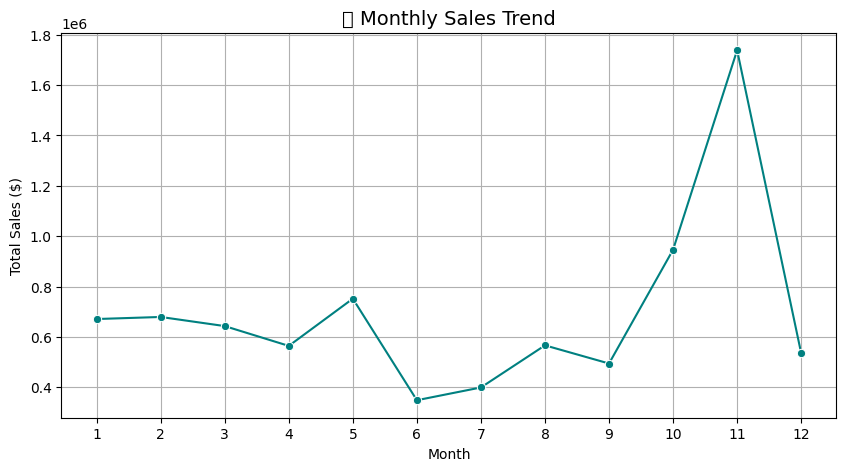

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly sales trend
monthly_sales = data.groupby('MONTH')['TOTALPRICE'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='teal')
plt.title(' Monthly Sales Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


/tmp/ipython-input-40-2294065953.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


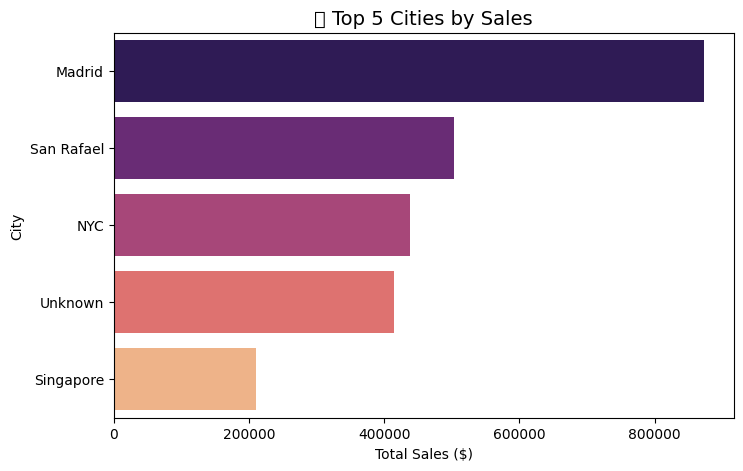

In [ ]:
# Top cities by sale
top_cities = data.groupby('CITY')['TOTALPRICE'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')
plt.title(' Top 5 Cities by Sales', fontsize=14)
plt.xlabel('Total Sales ($)')
plt.ylabel('City')
plt.show()


/tmp/ipython-input-41-1890556261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


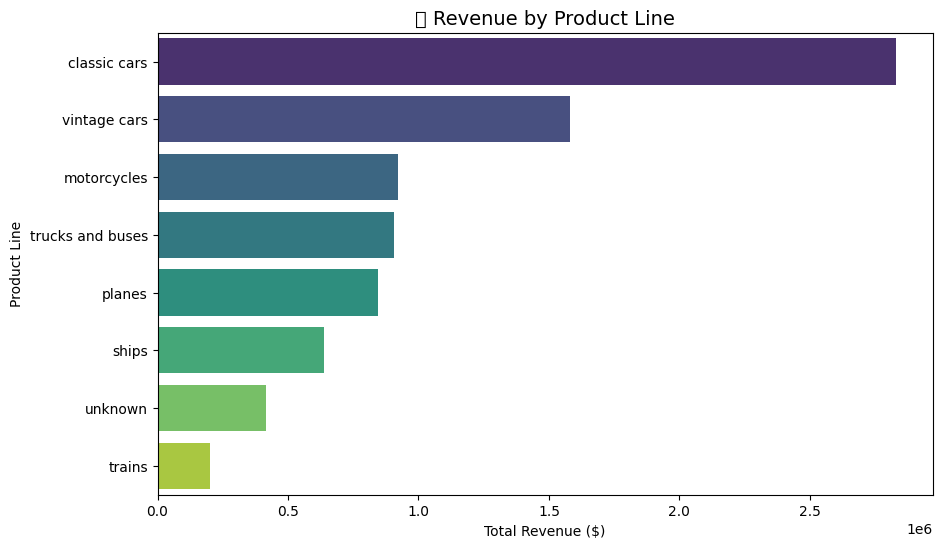

In [ ]:
# Revenue by product line
product_revenue = data.groupby('PRODUCTLINE')['TOTALPRICE'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='viridis')
plt.title('📊 Revenue by Product Line', fontsize=14)
plt.xlabel('Total Revenue ($)')
plt.ylabel('Product Line')
plt.show()


In [ ]:
data.to_csv('25-0020-I.csv', index=False)